<a href="https://colab.research.google.com/github/SangBeom-Hahn/Kdata_Campus_Daily_Study/blob/master/%EC%A0%84%EC%B2%98%EB%A6%AC_%2B_%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1_%EC%A0%84%ED%9B%84_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings, random
warnings.filterwarnings(action='ignore')

from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold

from sklearn.cluster import KMeans


import lightgbm as lgb
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/프로그래밍 언어 공부 자료/인공지능/2022 데청캠/강의 자료/6일차/2022 데이터 청년 캠퍼스 6일차 과제(신규식, 한상범)/SolarPv.xlsx")

In [ ]:
# 기본 전처리에 해당하는 전처리 1), 2)
df.at[df["Rain"] > 0, "Rain"] = 1
df.at[df["AveragePM10"] == -1, "AveragePM10"] = 0

In [ ]:
# 4)
df_Scaled = df.loc[:, ["AveragePM10", "Averagecloud", "Sight"]]
feature = ['AveragePM10', 'Averagecloud', 'Sight']

scaler = StandardScaler()
scaler.fit(df_Scaled)
df_Scaled_Result = scaler.transform(df_Scaled)
scaled_Result_Df = pd.DataFrame(df_Scaled_Result, columns = feature)
df_Main = df.drop(columns=['AveragePM10', 'Averagecloud', 'Sight'], axis = 1)
df_Total = pd.concat([df_Main, scaled_Result_Df], axis = 1)

In [ ]:
# + 날씨
df_Total = pd.get_dummies(df_Total, columns = ['WeatherForecast'])

In [ ]:
# + 날짜
df_Total['Date'] = pd.to_datetime(df_Total['Date'])
df_Total['year'] = df_Total["Date"].dt.year
df_Total['month'] = df_Total["Date"].dt.month
df_Total['day'] = df_Total["Date"].dt.day
df_Total.drop(["Date"], axis = 1, inplace=True)

In [ ]:
df_Total

,Generatedpower,Hightemp,HumidityForecast,Rain,Sunlight,AveragePM10,Averagecloud,Sight,WeatherForecast_강수,WeatherForecast_구름,WeatherForecast_맑음,WeatherForecast_안개,WeatherForecast_흐림,year,month,day
0,2230.406983,8.6,51.000000,0.0,13.5526,1.288648,-0.997195,-0.935683,0,0,1,0,0,2017,1,26
1,2326.791016,8.1,44.571429,0.0,13.1526,0.408548,-0.121018,0.344995,0,0,1,0,0,2017,1,27
2,2477.729004,10.8,37.000000,0.0,13.6300,0.131533,-0.868974,-0.843306,0,0,1,0,0,2017,1,28
3,241.446289,6.7,99.000000,1.0,2.4199,0.047852,1.674078,-1.221211,0,0,0,0,1,2017,1,29
4,2768.182617,3.5,54.571429,0.0,12.2054,-0.018517,-0.121018,-0.049706,0,0,1,0,0,2017,1,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1350,2878.000000,23.0,40.285714,0.0,17.6437,-0.786079,-0.420200,-0.074899,0,0,1,0,0,2020,10,7
1351,2937.250000,22.3,41.571429,0.0,20.1938,-0.598517,-0.954455,0.135048,0,0,1,0,0,2020,10,8
1352,2693.000000,23.0,41.000000,0.0,19.6520,-0.549462,0.114054,0.269414,0,1,0,0,0,2020,10,9
1353,2639.250000,23.3,47.285714,0.0,17.0335,-0.840905,-0.206498,0.177037,0,0,1,0,0,2020,10,10


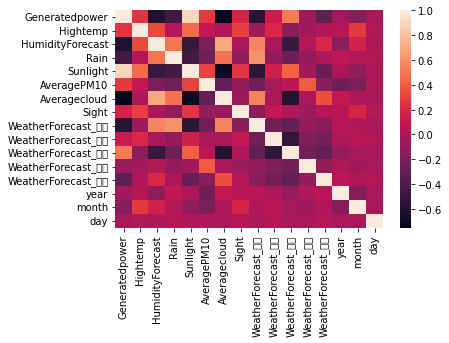

In [ ]:
# 운량이 다중공선성이 높음 -> 삭제
sns.heatmap(df_Total.corr())

In [ ]:
df_Total.drop("Averagecloud", axis = 1, inplace=True)

In [ ]:
X = df_Total.drop(["Generatedpower"], axis=1)
y = df_Total["Generatedpower"]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 34)

In [ ]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor()
lgbm_model.fit(X_train, y_train,verbose=True)

score = lgbm_model.score(X_valid, y_valid)
print(score)

0.8202995875931305


In [ ]:
# 오히려 결과가 떨어짐